### **Class distribution**

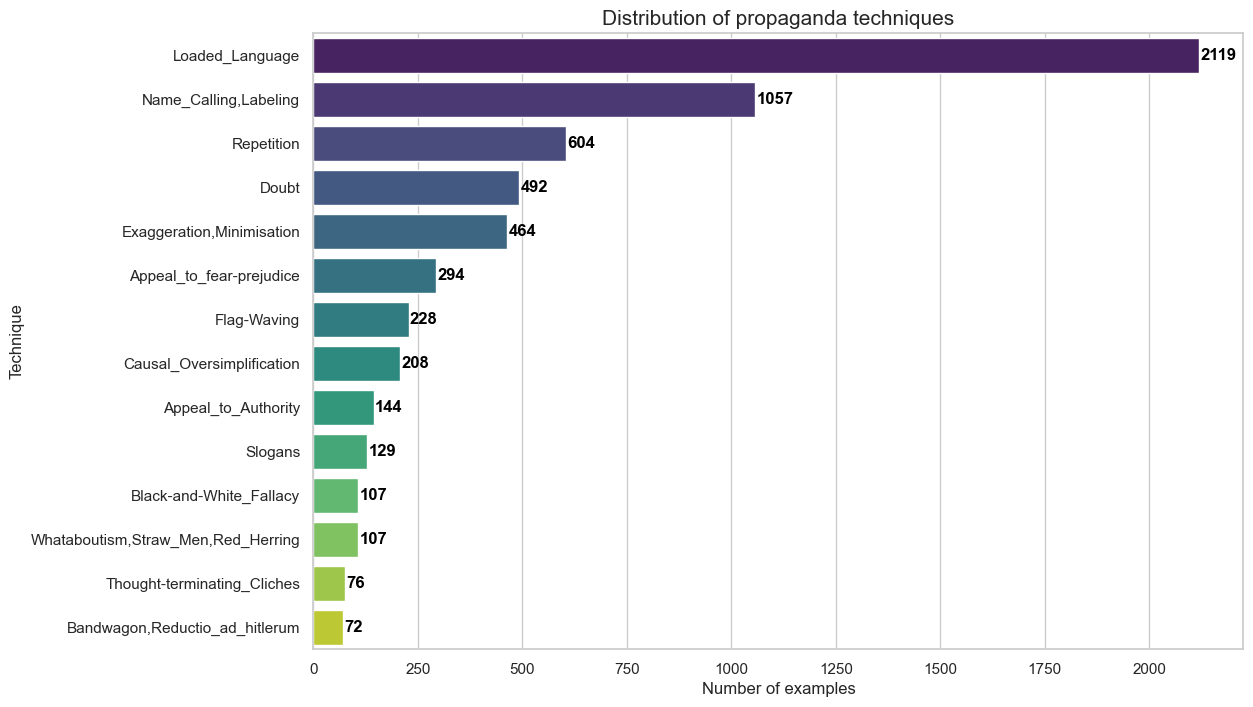

--- Percentage distribution of classes ---
label
Loaded_Language                       34.732011
Name_Calling,Labeling                 17.325029
Repetition                             9.900016
Doubt                                  8.064252
Exaggeration,Minimisation              7.605311
Appeal_to_fear-prejudice               4.818882
Flag-Waving                            3.737092
Causal_Oversimplification              3.409277
Appeal_to_Authority                    2.360269
Slogans                                2.114407
Black-and-White_Fallacy                1.753811
Whataboutism,Straw_Men,Red_Herring     1.753811
Thought-terminating_Cliches            1.245697
Bandwagon,Reductio_ad_hitlerum         1.180134
Name: proportion, dtype: float64


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

path = os.path.join('..', 'data', 'processed', 'dataset.csv')
df = pd.read_csv(path)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

class_counts = df['label'].value_counts()

ax = sns.barplot(x=class_counts.values, y=class_counts.index, hue=class_counts.index, palette="viridis", legend=False)

for i, v in enumerate(class_counts.values):
    ax.text(v + 3, i, str(v), color='black', va='center', fontweight='bold')

plt.title('Distribution of propaganda techniques', fontsize=15)
plt.xlabel('Number of examples', fontsize=12)
plt.ylabel('Technique', fontsize=12)
plt.show()

print("--- Percentage distribution of classes ---")
print(df['label'].value_counts(normalize=True) * 100)

### **Length and counts**

In [ ]:
import plotly.express as px

df['context_words'] = df['context'].apply(lambda x: len(str(x).split()))
df['fragment_words'] = df['fragment'].apply(lambda x: len(str(x).split()))

fig = px.histogram(
    df, 
    x="context_words", 
    nbins=50,
    title='Sentence length distribution',
    labels={'context_words': 'Number of words', 'count': 'Number of sentences'},
    color_discrete_sequence=['skyblue'],
    marginal="box" 
)

fig.update_layout(
    bargap=0.1,
    xaxis_title="Number of words in a sentence",
    yaxis_title="Number of examples in the dataset"
)

fig.show()

In [4]:
print("Context length statistics (words):")
print(df['context_words'].describe())

print("\nFragment length statistics (words):")
print(df['fragment_words'].describe())

Context length statistics (words):
count    6101.000000
mean       29.447795
std        17.330219
min         1.000000
25%        17.000000
50%        27.000000
75%        38.000000
max       138.000000
Name: context_words, dtype: float64

Fragment length statistics (words):
count    6101.000000
mean        8.044419
std        10.798368
min         1.000000
25%         2.000000
50%         4.000000
75%         9.000000
max       141.000000
Name: fragment_words, dtype: float64


In [5]:
long_sentences = df[df['context_words'] > 100]

print(f"{len(long_sentences)} abnormally long sentences found.\n")

for i, row in long_sentences.head(3).iterrows():
    print(f"Article ID: {row['article_id']}")
    print(f"Length: {row['context_words']} words")
    print(f"Context text: {row['context'][:500]}...")
    print("-" * 50)

23 abnormally long sentences found.

Article ID: article722512241
Length: 102 words
Context text: The signers, however, are not dissuaded in their pursuit of a paternal answer:
You do not like to beat around the bush, and neither do we, so allow us to say frankly that we do not understand your teaching about Islam, as we read in paragraphs 252 and 253 of Evangelii Gaudium, because it does not account for the fact that Islam came AFTER Christ, and so is, and can only be, an Antichrist (see 1 Jn 2.22), and one of the most dangerous because it presents itself as the fulfillment of Revelation (o...
--------------------------------------------------
Article ID: article758386255
Length: 107 words
Context text: The document makes it inarguable that the federation’s main role will be to establish and monitor for conformity to a particular programme – the “intense and fruitful path” of the Church since 1965 – both within the various orders and between them:
The Federal Assembly:
deals with issu